# Метод опорных векторов Support Vector Classification

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import numpy as np
import cv2
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Bonus Track

In [49]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [50]:
import os
imagePaths = sorted(os.listdir('/content/drive/MyDrive/projects/data/train'))

## Тренировочная выборка


In [51]:
data = []
labels = []

for path in imagePaths:
  image = cv2.imread('/content/drive/MyDrive/projects/data/train/'+path)
  label = path.split(".")[0]
  labels.append(label)
  hist = extract_histogram(image)
  data.append(hist)

In [52]:
df = pd.DataFrame(data=data)

In [53]:
from IPython.display import Image

In [54]:
le = LabelEncoder()
labels = le.fit_transform(labels)
# Image(filename='/content/drive/MyDrive/projects/data/train/'+imagePaths[0])

In [55]:
df.index = imagePaths
df['label'] = labels
df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,label
cat.0.jpg,0.242645,0.073122,0.000232,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.087363,...,0.000000,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0
cat.1.jpg,0.418818,0.126781,0.000085,0.000000,0.000000,0.0,0.0,0.0,0.005085,0.076441,...,0.000000,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.000042,0.000000,0
cat.10.jpg,0.356737,0.184168,0.020616,0.001619,0.000717,0.0,0.0,0.0,0.000041,0.027440,...,0.000000,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.007726,0
cat.100.jpg,0.001266,0.019995,0.011941,0.001583,0.000158,0.0,0.0,0.0,0.000000,0.002145,...,0.002233,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.023354,0.497077,0
cat.101.jpg,0.000000,0.000105,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000366,...,0.000000,0.0,0.002719,0.7748,0.34338,0.038583,0.114442,0.126833,0.008469,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dog.95.jpg,0.134753,0.010071,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.004053,0.041960,...,0.005025,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.012636,0.010754,1
dog.96.jpg,0.122335,0.165961,0.041414,0.016499,0.000102,0.0,0.0,0.0,0.000991,0.147656,...,0.000000,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,1
dog.97.jpg,0.081336,0.033835,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.006635,...,0.002249,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.004499,0.228866,1
dog.98.jpg,0.598071,0.090467,0.006297,0.000019,0.000000,0.0,0.0,0.0,0.000019,0.037595,...,0.000190,0.0,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.010350,1


## Разделение

In [56]:
X = df.drop('label', axis=1)
y = df['label']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=12,
                                                    train_size=0.75
                                                    )

## Тестовая выборка

In [58]:
imagePaths_test =  sorted(os.listdir('/content/drive/MyDrive/projects/data/test'))

In [59]:
test_data = []
test_labels = []

for path in imagePaths_test:
  image = cv2.imread('/content/drive/MyDrive/projects/data/test/'+path)
  label = path.split(".")[0]
  test_labels.append(label)
  hist = extract_histogram(image)
  test_data.append(hist)

In [60]:
test_labels = le.transform(test_labels)

In [61]:
df_test = pd.DataFrame(data=test_data)
# df_test['label'] = test_labels
df_test.index = imagePaths_test
df_test

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
cat.1000.jpg,0.567117,0.194313,0.009939,0.000406,0.0,0.0,0.0,0.0,0.001014,0.261450,...,0.065312,0.000811,0.0,0.0,0.0,0.0,0.000000,0.000000,0.154963,0.218247
cat.1001.jpg,0.013429,0.020131,0.021416,0.000176,0.0,0.0,0.0,0.0,0.012976,0.030814,...,0.000000,0.000076,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000025,0.000000
cat.1002.jpg,0.305423,0.080943,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003492,0.090926,...,0.000141,0.001008,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000258,0.024489
cat.1003.jpg,0.399897,0.002392,0.000000,0.000000,0.0,0.0,0.0,0.0,0.110738,0.052461,...,0.012558,0.000272,0.0,0.0,0.0,0.0,0.000000,0.000000,0.010275,0.214028
cat.1004.jpg,0.693011,0.144219,0.003652,0.000306,0.0,0.0,0.0,0.0,0.002686,0.131873,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000024,0.024763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dog.1045.jpg,0.042874,0.013570,0.000000,0.000000,0.0,0.0,0.0,0.0,0.072613,0.139533,...,0.000020,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.017280,0.182288
dog.1046.jpg,0.092043,0.000226,0.000000,0.000000,0.0,0.0,0.0,0.0,0.010420,0.009717,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
dog.1047.jpg,0.496956,0.048788,0.000411,0.000000,0.0,0.0,0.0,0.0,0.081550,0.128507,...,0.000261,0.000000,0.0,0.0,0.0,0.0,0.000037,0.000112,0.003026,0.016848
dog.1048.jpg,0.140861,0.069838,0.000000,0.000000,0.0,0.0,0.0,0.0,0.004180,0.080936,...,0.000194,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.020902,0.597341


## Обучение

In [62]:
scv = LinearSVC(C=0.65, random_state = 12)

In [63]:
scv.fit(X_train, y_train)

LinearSVC(C=0.65, random_state=12)

In [64]:
y_pred = scv.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.61      0.71      0.65       127
         dog       0.64      0.53      0.58       123

    accuracy                           0.62       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.62      0.62      0.62       250



In [66]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0])

In [67]:
matrix_cat = confusion_matrix(y_test, y_pred, labels=[0,1])
tp_cat, fn_cat, fp_cat, tn_cat = matrix_cat.flatten()

matrix_dog = confusion_matrix(y_test, y_pred, labels=[1,0])
tp_dog, fn_dog, fp_dog, tn_dog = matrix_dog.flatten()

In [68]:
matrix_cat

array([[90, 37],
       [58, 65]])

In [69]:
matrix_dog

array([[65, 58],
       [37, 90]])

In [70]:
precision_cat = tp_cat / (tp_cat + fp_cat)
recall_cat = tp_cat / (tp_cat + fn_cat)

precision_dog = tp_dog / (tp_dog + fp_dog)
recall_dog = tp_dog / (tp_dog + fn_dog)

In [71]:
F1_cat = 2 * ((precision_cat * recall_cat)/(precision_cat + recall_cat))
F1_dog = 2 * ((precision_dog * recall_dog)/(precision_dog + recall_dog))

In [72]:
macro_F1 = (F1_cat + F1_dog)/2
macro_F1

0.6161616161616162

In [73]:
f1_score(y_test, y_pred, average='macro')

0.6161616161616162

In [74]:
scv.coef_[0][385], scv.coef_[0][475], scv.coef_[0][167]

(0.0, 0.0009412659711496088, -0.048338327358824665)

## Предсказания

In [75]:
Y_pred = scv.predict(df_test)

In [76]:
df_test['Y'] = Y_pred

In [77]:
df_test['image'] = images_test

NameError: ignored

In [ ]:
df_test

In [ ]:
df_test[df_test['image']=='cat.1017.jpg']['Y']

In [ ]:
df_test[df_test['image']=='cat.1041.jpg']['Y']

In [ ]:
df_test[df_test['image']=='cat.1014.jpg']['Y']

In [ ]:
df_test[df_test['image']=='dog.1042.jpg']['Y']

# Задание 1

In [78]:
df = pd.read_csv(r'/content/drive/MyDrive/projects/data/persons_pics_train.csv')

In [79]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2905,2906,2907,2908,2909,2910,2911,2912,2913,label
0,0.379085,0.312418,0.352941,0.445752,0.466667,0.473203,0.484967,0.513725,0.545098,0.571242,...,0.597386,0.620915,0.732026,0.852288,0.921569,0.937255,0.941176,0.950327,0.946405,John Ashcroft
1,0.450980,0.466667,0.512418,0.509804,0.450980,0.458824,0.516340,0.571242,0.607843,0.618301,...,0.430065,0.453595,0.679739,0.934640,0.985621,0.981699,0.963399,0.938562,0.874510,Ariel Sharon
2,0.589542,0.614379,0.688889,0.729412,0.738562,0.775163,0.789543,0.806536,0.820915,0.837908,...,0.733333,0.854902,0.937255,0.624837,0.128105,0.082353,0.107190,0.095425,0.100654,Colin Powell
3,0.390850,0.432680,0.499346,0.562091,0.597386,0.644444,0.670588,0.650980,0.637908,0.639216,...,0.713726,0.898039,0.968627,0.959477,0.832680,0.443137,0.266667,0.303268,0.313725,Jean Chretien
4,0.645752,0.626144,0.605229,0.585621,0.602614,0.664052,0.701961,0.709804,0.733333,0.771242,...,0.115033,0.129412,0.132026,0.129412,0.155556,0.171242,0.167320,0.176471,0.183007,Colin Powell


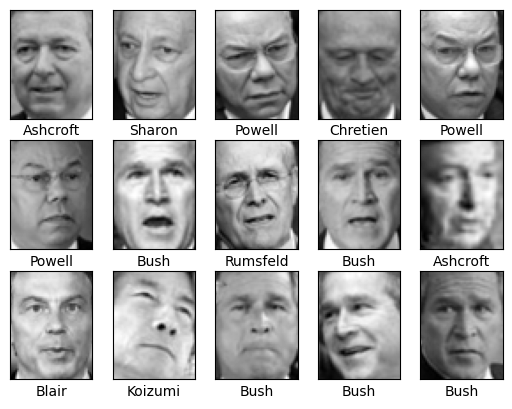

In [80]:
def get_img_by_row(row):
  return row.drop('label').astype(float).to_numpy().reshape(62,47), row['label']

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    img, lbl = get_img_by_row(df.iloc[i])
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl.split()[-1])
plt.savefig('persons_pics_img_for_description.png', dpi = 300, bbox_inches='tight')

(-0.5, 46.5, 61.5, -0.5)

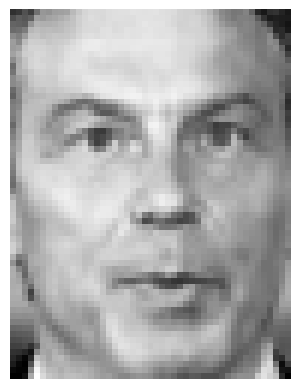

In [81]:
plt.imshow(df.iloc[10].drop('label').astype(float).to_numpy().reshape(62,47), cmap='gray')
plt.axis('off')

1. Предварительный анализ и немного озорства.

Определите число различных людей, фотографии которых содержатся в рассматриваемом наборе данных.

In [82]:
unique_values = df['label'].unique()
unique_values.size

12

Постройте гистограмму распределения объектов по классам и вычислите долю объектов каждого класса.

Введите долю объектов класса

(array([110., 201.,  47., 451., 103., 122.,  51.,  93.,  60.,  88.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

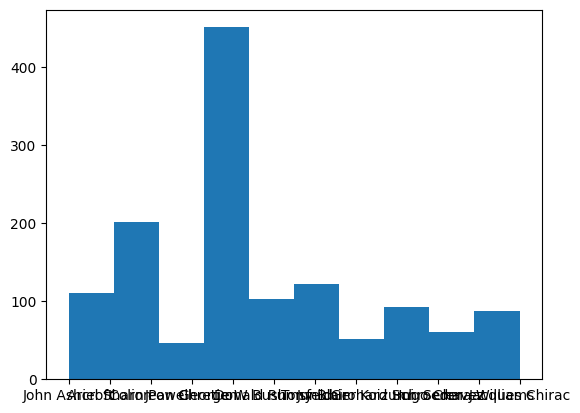

In [83]:
plt.hist(df['label'])

In [84]:
df['label'].value_counts()/df.shape[0]

George W Bush        0.340121
Colin Powell         0.151584
Tony Blair           0.092006
Donald Rumsfeld      0.077677
Gerhard Schroeder    0.070136
Ariel Sharon         0.049020
Hugo Chavez          0.045249
Junichiro Koizumi    0.038462
Jean Chretien        0.035445
John Ashcroft        0.033937
Serena Williams      0.033183
Jacques Chirac       0.033183
Name: label, dtype: float64

На основе имеющихся данных поставьте в соответствие каждому человеку один вектор, координаты которого являются средним соответствующих координат всех векторов, отождествленных с этим человеком.

In [85]:
df_mean = df.groupby('label').mean()
df_mean
labels = df_mean.index

Используя усредненные векторы, постройте изображения всех людей из набора данных. Определите, кто изображен на картинке.

In [86]:
df_mean

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
label,,,,,,,,,,,,,,,,,,,,,
Ariel Sharon,0.501398,0.514811,0.532609,0.551714,0.569754,0.577456,0.581820,0.591835,0.604465,0.612589,...,0.396400,0.433947,0.478291,0.519920,0.532549,0.515656,0.498220,0.486657,0.466928,0.437687
Colin Powell,0.433512,0.441147,0.456248,0.471947,0.486730,0.513732,0.545157,0.566514,0.581556,0.592924,...,0.437869,0.471798,0.512067,0.534615,0.532176,0.510006,0.477586,0.448119,0.410659,0.379605
Donald Rumsfeld,0.404810,0.417260,0.442731,0.474028,0.507938,0.541659,0.560112,0.571838,0.585773,0.602386,...,0.494917,0.546837,0.562307,0.558627,0.549426,0.525947,0.500603,0.475550,0.431893,0.391738
George W Bush,0.348179,0.360263,0.381659,0.416669,0.457154,0.488335,0.515398,0.536075,0.551153,0.565662,...,0.385818,0.414092,0.441074,0.461325,0.470275,0.459067,0.447653,0.430523,0.399620,0.376584
Gerhard Schroeder,0.210162,0.228210,0.268255,0.328344,0.389332,0.447115,0.495003,0.527655,0.549441,0.569457,...,0.414969,0.430937,0.469281,0.494596,0.496718,0.482550,0.442252,0.428477,0.426875,0.411118
Hugo Chavez,0.206885,0.205142,0.240828,0.300806,0.370196,0.427712,0.471939,0.512702,0.545251,0.562070,...,0.337647,0.360523,0.372200,0.385926,0.394662,0.392309,0.384989,0.371503,0.372440,0.374052
Jacques Chirac,0.348010,0.368152,0.405704,0.436988,0.462686,0.498693,0.531135,0.553060,0.574629,0.594029,...,0.453832,0.469935,0.480957,0.486067,0.510933,0.537998,0.542751,0.505853,0.456625,0.434997
Jean Chretien,0.388958,0.412488,0.446614,0.487637,0.526158,0.563315,0.594827,0.628981,0.665026,0.685774,...,0.526380,0.574190,0.583452,0.555667,0.499764,0.455180,0.426060,0.415353,0.414713,0.397608
John Ashcroft,0.337894,0.334379,0.337662,0.357037,0.384779,0.397182,0.412375,0.431924,0.449441,0.466986,...,0.472651,0.468468,0.475759,0.489092,0.512999,0.540944,0.534524,0.524415,0.527495,0.527495


In [87]:
df_mean = df_mean.reset_index(drop=False)

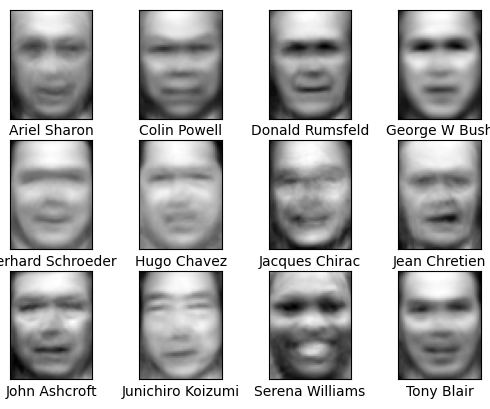

In [88]:
def get_img_by_row(row):
  return row.drop('label').astype(float).to_numpy().reshape(62,47), row['label']

fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    img, lbl = get_img_by_row(df_mean.iloc[i])
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl)
plt.savefig('mean_pics.png', dpi = 300, bbox_inches='tight')

Постройте матрицу схожести объектов на основе их усредненных векторов. В качестве меры схожести используйте косинусное сходство.

In [89]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = pd.DataFrame(cosine_similarity(df_mean.drop('label', axis=1)), index=labels, columns=labels)
similarity_matrix

label,Ariel Sharon,Colin Powell,Donald Rumsfeld,George W Bush,Gerhard Schroeder,Hugo Chavez,Jacques Chirac,Jean Chretien,John Ashcroft,Junichiro Koizumi,Serena Williams,Tony Blair
label,,,,,,,,,,,,
Ariel Sharon,1.000000,0.997854,0.996752,0.994814,0.993415,0.989612,0.993172,0.995977,0.995131,0.987816,0.987774,0.995362
Colin Powell,0.997854,1.000000,0.997700,0.996409,0.995470,0.992776,0.995131,0.996490,0.996295,0.990409,0.988370,0.997367
Donald Rumsfeld,0.996752,0.997700,1.000000,0.996645,0.996309,0.991954,0.995152,0.997448,0.995308,0.988584,0.986606,0.997292
George W Bush,0.994814,0.996409,0.996645,1.000000,0.997728,0.996353,0.996223,0.993516,0.997465,0.993667,0.985307,0.997331
Gerhard Schroeder,0.993415,0.995470,0.996309,0.997728,1.000000,0.997621,0.997229,0.994118,0.996986,0.993774,0.985748,0.998107
Hugo Chavez,0.989612,0.992776,0.991954,0.996353,0.997621,1.000000,0.995185,0.989890,0.994794,0.993828,0.983244,0.996131
Jacques Chirac,0.993172,0.995131,0.995152,0.996223,0.997229,0.995185,1.000000,0.993350,0.996172,0.994746,0.983479,0.996284
Jean Chretien,0.995977,0.996490,0.997448,0.993516,0.994118,0.989890,0.993350,1.000000,0.993907,0.986172,0.982785,0.995850
John Ashcroft,0.995131,0.996295,0.995308,0.997465,0.996986,0.994794,0.996172,0.993907,1.000000,0.993632,0.987354,0.996908


In [112]:
similarity_matrix.loc['Gerhard Schroeder', 'Serena Williams']

0.9857477316972296

2. Построение модели.

Первое приближение: базовый SVM классификатор с линейным ядром.

При помощи train_test_split() разбейте набор данных на обучающую и тестовую выборки с параметрами test_size=0.2, random_state=9. Используйте стратификацию по колонке label. Обучите модель SVC() на тренировочном наборе данных со следующими параметрами: kernel='linear', random_state=9. Оцените модель на тестовых данных.

In [113]:
random_state = 15

In [114]:
X = df.drop('label', axis=1)
y = df['label']

In [115]:
train_data, test_data, train_labels, test_labels = train_test_split(X,y,
                                                                    train_size=0.8,
                                                                    random_state=random_state,
                                                                    stratify=y)

In [116]:
model = SVC(kernel='linear', random_state=random_state)
model.fit(train_data, train_labels)
predictions = model.predict(test_data)

In [117]:
f1_score(test_labels, predictions, average='weighted')

0.8027923282543553

Подбор гиперпараметров

Используя GridSearchCV(), осуществите подбор гиперпараметров на основе следующих значений:

In [96]:
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000], 'class_weight': [None, 'balanced'], 'random_state':[9]}]


cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)

In [97]:
cv.fit(train_data, train_labels)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=9;, score=0.807 total time=   0.6s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=9;, score=0.792 total time=   0.6s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=9;, score=0.769 total time=   0.6s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=9;, score=0.797 total time=   0.6s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=9;, score=0.764 total time=   0.6s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=9;, score=0.349 total time=   0.8s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=9;, score=0.358 total time=   0.7s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=9;, score=0.368 total time=   0.7s
[CV 4/5] END C=1, class_weight=None, gam

KeyboardInterrupt: ignored

In [ ]:
cv.best_params_

Выполните предсказание для тестовых данных при помощи лучшей полученной модели.

Вычислите f1_score(average='weighted') модели на тестовых данных.

In [118]:
model = SVC(C=100, class_weight='balanced', gamma=0.001, kernel='rbf', random_state=random_state)
model.fit(train_data, train_labels)
predictions = model.predict(test_data)

In [119]:
f1_score(test_labels, predictions, average='weighted')

0.7955559012883923

Обучите модель PCA(svd_solver='full') на тренировочных данных и определите минимальное количество компонент, необходимое для того, чтобы уровень объясненной дисперсии был больше 0.95.

Введите требуемое число главных компонент.

In [122]:
pca = PCA(svd_solver='full', n_components=173)
p_components = pca.fit_transform(train_data)
componentsDf = pd.DataFrame(data = p_components)

In [123]:
varOriginal = sum(np.var(train_data))
varSimplified = sum(np.var(componentsDf))
disp = varSimplified / varOriginal
disp

0.9502042111384156

Заново обучите модель PCA(svd_solver='full') на тренировочных данных с использованием полученного числа ГК. Примените полученное преобразование для тренировочных и тестовых данных. Для полученных после PCA данных аналогично проделанному ранее, то есть используя GridSearchCV(), осуществите подбор гиперпараметров из указанных ранее диапазонов. Отдельно обратите внимание на время обучения моделей. Определите следующие параметры лучшей полученной модели (cv.best_params_).

In [124]:
train_data = componentsDf
test_data = pd.DataFrame(pca.transform(test_data))

In [125]:
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000], 'class_weight': [None, 'balanced'], 'random_state':[random_state]}]


cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)
cv.fit(train_data, train_labels)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=15;, score=0.741 total time=   0.1s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=15;, score=0.759 total time=   0.1s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=15;, score=0.741 total time=   0.1s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=15;, score=0.755 total time=   0.1s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=15;, score=0.736 total time=   0.1s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=15;, score=0.340 total time=   0.1s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=15;, score=0.344 total time=   0.1s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=15;, score=0.340 total time=   0.1s
[CV 4/5] END C=1, class_weight=N

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'class_weight': [None, 'balanced'],
                          'gamma': [0.001, 0.0001],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'random_state': [15]}],
             verbose=3)

In [126]:
cv.best_params_

{'C': 1000,
 'class_weight': 'balanced',
 'gamma': 0.0001,
 'kernel': 'rbf',
 'random_state': 15}

Выполните предсказание для тестовых данных при помощи лучшей полученной модели.

Вычислите f1_score(average='weighted') модели на тестовых данных.

In [127]:
# model = SVC(C=100, class_weight=None, gamma=0.001, kernel='rbf', random_state=random_state)
model = cv.best_estimator_

In [128]:
model.fit(train_data, train_labels)
predictions = model.predict(test_data)

In [129]:
f1_score(test_labels, predictions, average='weighted')

0.7972071968887497

# Задание 2

In [130]:
df = pd.read_csv(r'/content/drive/MyDrive/projects/data/persons_pics_train.csv')

In [131]:
X = df.drop('label', axis=1)
y = df['label']

train_data, test_data, train_labels, test_labels = train_test_split(X,y,
                                                                    train_size=0.8,
                                                                    random_state=random_state,
                                                                    stratify=y)

model = SVC(kernel='linear', random_state=random_state)
model.fit(train_data, train_labels)
predictions = model.predict(test_data)
f1_score(test_labels, predictions, average='weighted')

0.8027923282543553

In [132]:
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000], 'class_weight': [None, 'balanced'], 'random_state':[random_state]}]


cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)

In [138]:
cv.fit(train_data, train_labels)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=15;, score=0.759 total time=   0.6s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=15;, score=0.764 total time=   0.6s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=15;, score=0.778 total time=   0.6s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=15;, score=0.797 total time=   0.6s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=15;, score=0.774 total time=   0.6s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=15;, score=0.368 total time=   0.7s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=15;, score=0.358 total time=   0.8s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=15;, score=0.358 total time=   0.7s
[CV 4/5] END C=1, class_weight=N

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'class_weight': [None, 'balanced'],
                          'gamma': [0.001, 0.0001],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'random_state': [15]}],
             verbose=3)

In [159]:
cv.best_params_

{'C': 100,
 'class_weight': 'balanced',
 'gamma': 0.001,
 'kernel': 'rbf',
 'random_state': 15}

In [164]:
model = SVC(C=100, class_weight='balanced', gamma=0.001, kernel='rbf', random_state=9)
model = cv.best_estimator_
model.fit(train_data, train_labels)
predictions = model.predict(test_data)
f1_score(test_labels, predictions, average='weighted')

0.7955559012883923

## Предсказание

In [161]:
df_test = pd.read_csv('/content/drive/MyDrive/projects/data/persons_pics_reserved.csv')

In [165]:
predictions = model.predict(df_test)

In [166]:
predictions

array(['George W Bush', 'George W Bush', 'Jacques Chirac',
       'Jacques Chirac', 'Tony Blair', 'Colin Powell', 'Donald Rumsfeld',
       'Colin Powell', 'Tony Blair', 'George W Bush', 'Donald Rumsfeld',
       'Hugo Chavez', 'George W Bush', 'Hugo Chavez', 'Colin Powell',
       'George W Bush', 'Ariel Sharon', 'Colin Powell', 'John Ashcroft',
       'Gerhard Schroeder', 'Ariel Sharon', 'George W Bush',
       'Ariel Sharon', 'George W Bush', 'George W Bush',
       'Donald Rumsfeld', 'Donald Rumsfeld', 'Tony Blair',
       'Serena Williams', 'Jean Chretien', 'George W Bush',
       'Gerhard Schroeder', 'George W Bush', 'George W Bush',
       'George W Bush', 'Donald Rumsfeld', 'Colin Powell',
       'Jacques Chirac', 'George W Bush', 'Gerhard Schroeder',
       'Colin Powell', 'Donald Rumsfeld', 'Gerhard Schroeder',
       'George W Bush', 'Tony Blair', 'George W Bush', 'George W Bush',
       'Gerhard Schroeder', 'Colin Powell', 'Tony Blair',
       'Serena Williams', 'Jean Chret

['George W Bush', 'Ariel Sharon', 'Tony Blair', 'Jacques Chirac',
       'Tony Blair', 'Colin Powell', 'Donald Rumsfeld', 'Colin Powell',
       'Tony Blair', 'Gerhard Schroeder', 'Donald Rumsfeld',
       'Hugo Chavez', 'George W Bush', 'Hugo Chavez', 'Colin Powell',
       'George W Bush', 'Ariel Sharon', 'Colin Powell', 'John Ashcroft',
       'Gerhard Schroeder', 'Ariel Sharon', 'George W Bush',
       'Ariel Sharon', 'George W Bush', 'George W Bush',
       'Donald Rumsfeld', 'Donald Rumsfeld', 'Tony Blair',
       'Serena Williams', 'Jean Chretien', 'George W Bush',
       'Gerhard Schroeder', 'George W Bush', 'George W Bush',
       'George W Bush', 'Colin Powell', 'Donald Rumsfeld', 'Colin Powell',
       'George W Bush', 'Gerhard Schroeder', 'Colin Powell',
       'Donald Rumsfeld', 'Gerhard Schroeder', 'George W Bush',
       'Tony Blair', 'George W Bush', 'George W Bush', 'Tony Blair',
       'Colin Powell', 'Tony Blair', 'Serena Williams', 'Jean Chretien',
       'Tony Blair', 'George W Bush', 'Colin Powell', 'George W Bush',
       'George W Bush', 'George W Bush', 'George W Bush', 'George W Bush',
       'Gerhard Schroeder', 'Gerhard Schroeder', 'Donald Rumsfeld',
       'Jean Chretien', 'Tony Blair', 'Ariel Sharon', 'George W Bush',
       'George W Bush', 'Hugo Chavez', 'George W Bush', 'John Ashcroft',
       'Gerhard Schroeder', 'George W Bush', 'George W Bush',
       'Colin Powell', 'George W Bush', 'George W Bush', 'Colin Powell',
       'Colin Powell', 'Donald Rumsfeld', 'Junichiro Koizumi',
       'Donald Rumsfeld', 'George W Bush', 'Colin Powell',
       'George W Bush', 'Serena Williams', 'Colin Powell',
       'Jean Chretien', 'Tony Blair', 'Ariel Sharon', 'Ariel Sharon',
       'George W Bush', 'Colin Powell', 'Donald Rumsfeld',
       'Jacques Chirac', 'George W Bush', 'Gerhard Schroeder',
       'George W Bush', 'Tony Blair', 'George W Bush', 'Colin Powell',
       'George W Bush', 'George W Bush', 'George W Bush', 'George W Bush',
       'Jean Chretien', 'George W Bush', 'George W Bush', 'George W Bush',
       'John Ashcroft', 'Serena Williams', 'John Ashcroft',
       'Junichiro Koizumi', 'Jacques Chirac', 'George W Bush',
       'George W Bush', 'Donald Rumsfeld', 'Gerhard Schroeder',
       'Tony Blair', 'Ariel Sharon', 'George W Bush', 'Tony Blair',
       'Donald Rumsfeld', 'George W Bush', 'Ariel Sharon',
       'Serena Williams', 'Colin Powell', 'Jacques Chirac',
       'George W Bush', 'Junichiro Koizumi', 'Serena Williams',
       'Colin Powell', 'George W Bush', 'Hugo Chavez', 'George W Bush',
       'Donald Rumsfeld', 'George W Bush', 'Tony Blair', 'Colin Powell',
       'George W Bush', 'Jacques Chirac', 'John Ashcroft',
       'John Ashcroft', 'Gerhard Schroeder', 'George W Bush',
       'George W Bush', 'Colin Powell', 'George W Bush', 'Jacques Chirac',
       'George W Bush', 'Tony Blair', 'Colin Powell', 'Tony Blair',
       'Ariel Sharon', 'Gerhard Schroeder', 'Colin Powell',
       'Donald Rumsfeld', 'George W Bush', 'Jean Chretien',
       'George W Bush', 'Hugo Chavez', 'Colin Powell', 'George W Bush',
       'George W Bush', 'Colin Powell', 'Colin Powell', 'George W Bush',
       'Junichiro Koizumi', 'George W Bush', 'Ariel Sharon',
       'George W Bush', 'Tony Blair', 'Donald Rumsfeld',
       'Junichiro Koizumi', 'George W Bush', 'Jacques Chirac',
       'Tony Blair', 'Colin Powell', 'George W Bush', 'Donald Rumsfeld',
       'George W Bush', 'George W Bush', 'Hugo Chavez', 'Colin Powell',
       'Gerhard Schroeder', 'Ariel Sharon', 'George W Bush',
       'Ariel Sharon', 'Ariel Sharon', 'Donald Rumsfeld', 'Colin Powell',
       'George W Bush', 'George W Bush', 'George W Bush', 'Hugo Chavez',
       'Donald Rumsfeld', 'Jean Chretien', 'Hugo Chavez', 'Ariel Sharon',
       'Colin Powell', 'George W Bush', 'Colin Powell', 'John Ashcroft',
       'George W Bush', 'Gerhard Schroeder', 'George W Bush',
       'John Ashcroft', 'George W Bush', 'Colin Powell', 'Colin Powell',
       'Donald Rumsfeld', 'Hugo Chavez', 'George W Bush',
       'Gerhard Schroeder', 'Colin Powell', 'George W Bush', 'Tony Blair',
       'Tony Blair', 'George W Bush', 'Tony Blair', 'George W Bush',
       'George W Bush', 'Tony Blair', 'George W Bush', 'George W Bush',
       'George W Bush', 'George W Bush', 'Gerhard Schroeder',
       'Colin Powell', 'Colin Powell', 'George W Bush', 'Colin Powell',
       'John Ashcroft', 'Donald Rumsfeld']